In [7]:
# import autograd.numpy as np
import jax.numpy as jnp

# To do elementwise differentiation:
from autograd import elementwise_grad as egrad
from jax import grad, vmap



# To plot:
import matplotlib.pyplot as plt 


def f(x):
    return jnp.sin(2*jnp.pi*x + x**2)

def f_grad_analytic(x):
    return jnp.cos(2*jnp.pi*x + x**2)*(2*jnp.pi + 2*x)

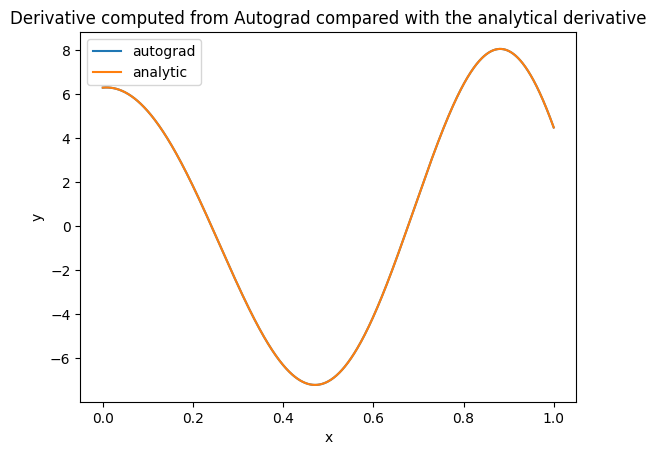

The max absolute difference is: 9.53674e-07


In [8]:
# Do the comparison:
x = jnp.linspace(0,1,1000)

f_grad = vmap(grad(f))

# computed = jnp.asarray([f_grad(x[i]) for i in range(len(x))])
computed = f_grad(x)
analytic = f_grad_analytic(x)

plt.title('Derivative computed from Autograd compared with the analytical derivative')
plt.plot(x,computed,label='autograd')
plt.plot(x,analytic,label='analytic')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

print("The max absolute difference is: %g"%(jnp.max(jnp.abs(computed - analytic))))